## Кластеризация

In [ ]:
import re
import numpy as np
import pandas as pd
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import collections
from collections import Counter

from nltk import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [ ]:
df = pd.read_csv('plset_fin_upd.csv')

In [ ]:
df.dropna(subset = ["Description"], inplace = True)

In [ ]:
Counter(pd.isna(df['Description'] == True))

Counter({False: 2038})

In [ ]:
df.head() 

,Unnamed: 0,Title,Author,Briefly,Description,Goal,Result,Donations,Start,Finish,LengthZn,LengthWd,NumSent,NumSentNLTK,Started,Finished,LeadBag,DaysLong
0,0,Подарим жизнь,Бобруйское общественное объединение защиты жив...,Спасение животных от эвтаназии на 5 сутки посл...,"Друзья, рады приветствовать на странице нашего...",10000.0,76100,67,11 сентября 2017,9 ноября 2017,1134,193,17,17,11 Sep 2017,9 Nov 2017,"['спасение', 'животное', 'эвтаназия', 'сутки',...",59
1,1,Оплата нянечек для отказных детей в больницах,"Благотворительный фонд ""Дети без мам""",Сбор средств на оплату ухода за детьми-сиротам...,"Когда ребёнок серьёзно болен, он ложится в бол...",150000.0,711665,470,1 июля 2014,16 сентября 2014,1749,300,21,22,1 Jul 2014,16 Sep 2014,"['сбор', 'средство', 'оплата', 'уход', 'ребёно...",77
2,2,Оплата нянь для детей-отказников в больницах,"Благотворительный фонд ""Дети без мам""",Сбор средств на уход за детьми-отказниками в б...,"В больницах живут малыши, оставшиеся без попеч...",50000.0,236257,202,14 октября 2013,16 января 2014,1693,275,20,20,14 Oct 2013,16 Jan 2014,"['сбор', 'средство', 'уход', 'ребёнок', 'отказ...",94
3,3,"""Не вешай нос! Или право на жизнь""",Местная общественная организация защитников жи...,Цель проекта - ликвидировать долги за ветерина...,"И снова здравствуйте, Друзья! \nМеня зовут Над...",29395.0,95300,170,21 февраля 2017,21 апреля 2017,2138,383,33,24,21 Feb 2017,21 Apr 2017,"['цель', 'проект', 'ликвидировать', 'долг', 'в...",59
4,4,Календарь реабилитационного центра для птиц,Вера Пахомова,"""Воронье Гнездо"" собирает средства на печать к...","Привет, друг! Мы снова на Planeta.ru!) \n В н...",15000.0,42550,87,9 ноября 2019,8 декабря 2019,1765,340,24,23,9 Nov 2019,8 Dec 2019,"['воронья', 'гнездо', 'собирать', 'средство', ...",29


In [ ]:
# Загрузили стопслова для русского языка из nltk
stopset = stopwords.words('russian')
stopset

['и',
 'в',
 'во',
 'не',
 'что',
 'он',
 'на',
 'я',
 'с',
 'со',
 'как',
 'а',
 'то',
 'все',
 'она',
 'так',
 'его',
 'но',
 'да',
 'ты',
 'к',
 'у',
 'же',
 'вы',
 'за',
 'бы',
 'по',
 'только',
 'ее',
 'мне',
 'было',
 'вот',
 'от',
 'меня',
 'еще',
 'нет',
 'о',
 'из',
 'ему',
 'теперь',
 'когда',
 'даже',
 'ну',
 'вдруг',
 'ли',
 'если',
 'уже',
 'или',
 'ни',
 'быть',
 'был',
 'него',
 'до',
 'вас',
 'нибудь',
 'опять',
 'уж',
 'вам',
 'ведь',
 'там',
 'потом',
 'себя',
 'ничего',
 'ей',
 'может',
 'они',
 'тут',
 'где',
 'есть',
 'надо',
 'ней',
 'для',
 'мы',
 'тебя',
 'их',
 'чем',
 'была',
 'сам',
 'чтоб',
 'без',
 'будто',
 'чего',
 'раз',
 'тоже',
 'себе',
 'под',
 'будет',
 'ж',
 'тогда',
 'кто',
 'этот',
 'того',
 'потому',
 'этого',
 'какой',
 'совсем',
 'ним',
 'здесь',
 'этом',
 'один',
 'почти',
 'мой',
 'тем',
 'чтобы',
 'нее',
 'сейчас',
 'были',
 'куда',
 'зачем',
 'всех',
 'никогда',
 'можно',
 'при',
 'наконец',
 'два',
 'об',
 'другой',
 'хоть',
 'после',
 'на

In [ ]:
stopset.extend(['это', '–'])

In [ ]:
def tokenize(txt):
    txt = txt.translate(str.maketrans('', '', '!"#$%&\'()*+,./:;<=>?@[\\]^_`{|}~«»№!—')).lower() # убрали знаки препинания и привели к нижнему регистру
    txt = [w for w in word_tokenize(txt) if not w in stopset] # токенизировали и избавились от стоп слов
    return txt

In [ ]:
tokenize(df['Briefly'].iloc[0])[:15]

['животных',
 'эвтаназии',
 '5',
 'сутки',
 'отлова',
 'спецавтопредприятия',
 'г',
 'бобруйска',
 'выкуп',
 'перемещение',
 'приют']

In [ ]:
vec = TfidfVectorizer(tokenizer=tokenize)
vec

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=<function tokenize at 0x7fdc01bb0400>, use_idf=True,
                vocabulary=None)

In [ ]:
bowed_texts = vec.fit_transform(df['Description'].values.astype('U'))

In [ ]:
bowed_texts

<1734x386568 sparse matrix of type '<class 'numpy.float64'>'
	with 513023 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.decomposition import TruncatedSVD

In [ ]:
svd = TruncatedSVD(n_components=100, n_iter=7, random_state=42)
svd.fit(bowed_texts)
bow_transformed = svd.transform(bowed_texts)

In [ ]:
model = KMeans(n_clusters=20, init='k-means++', max_iter=100, n_init=1, random_state=37)
model = model.fit(bow_transformed)

In [ ]:
set(model.labels_)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}

In [ ]:
df_new = df.assign(Cluster=model.labels_).reindex(['Title', 'Cluster'], axis='columns')
df_new[:5]

,Title,Cluster
0,Подарим жизнь,2
1,Оплата нянечек для отказных детей в больницах,5
2,Оплата нянь для детей-отказников в больницах,5
3,"""Не вешай нос! Или право на жизнь""",7
4,Календарь реабилитационного центра для птиц,6


In [ ]:
for i in range(20):
  print("Кластер %d:" %i, len(df_new.loc[df_new['Cluster'] == i]))

Кластер 0: 4
Кластер 1: 151
Кластер 2: 86
Кластер 3: 131
Кластер 4: 270
Кластер 5: 156
Кластер 6: 255
Кластер 7: 55
Кластер 8: 175
Кластер 9: 161
Кластер 10: 71
Кластер 11: 70
Кластер 12: 46
Кластер 13: 121
Кластер 14: 164
Кластер 15: 19
Кластер 16: 5
Кластер 17: 13
Кластер 18: 74
Кластер 19: 11


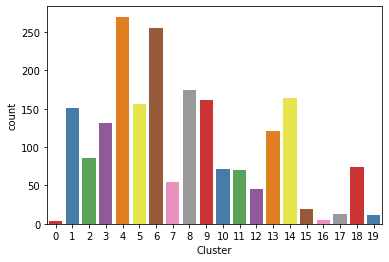

In [ ]:
sns.countplot(x=df_new['Cluster'], data=df_new, palette="Set1")

In [ ]:
df_new.loc[df_new['Cluster'] == 13]

,Title,Cluster
15,Помочь Вадиму встать на ноги!,13
27,Я буду танцевать!,13
56,Пойти в детский сад вместе!,13
60,Оборудование для реабилитации детей с ДЦП,13
63,Первые шаги Егора и Тимофея,13
...,...,...
2003,Дети-ангелы среди нас!,13
2004,Поможем Арсену начать ходить,13
2020,Волшебный костюм для Саввы,13
2027,Как помочь детям-ангелам?,13


In [ ]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1] # индексы слов, по мере убывания близости к центру
terms = vec.get_feature_names() # массив слов в том порядке, в котором их помнит kmeans
for i in range(20):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]: # печатаем 10 самых близких
        print(terms[ind])
    print()

Top terms per cluster:
Cluster 0:
ивл
аппарат
легких
-
девочка
вентиляции
мама
дышать
реанимации
ксюша

Cluster 1:
коров
гошала
акции
людей
-
нам
календарь
ветеринарии
проекта
николь

Cluster 2:
-
инвалидов
людей
слепоглухих
инвалидностью
мастерской
проекта
мастерская
проект
молодых

Cluster 3:
детей
детских
домов
-
ребят
дети
лагерь
ребята
•
детского

Cluster 4:
-
мастерских
ребят
детей
нам
проекта
работы
руб
развития
занятия

Cluster 5:
детей
праздник
подарки
детям
-
сердца
дети
год
праздника
нам

Cluster 6:
приюта
животных
приют
бездомных
собаки
собак
приюту
приюте
-
животным

Cluster 7:
теплое
архангельской
детство
деток
больнице
новорожденных
неравнодушными
архангельска
отделения
малышей

Cluster 8:
-
лечения
лечение
мама
очень
реабилитации
дцп
диагноз
курс
ходить

Cluster 9:
животных
собак
бездомных
кошек
животным
-
стерилизации
приют
нам
животные

Cluster 10:
детей
-
ограниченными
возможностями
дети
здоровья
детям
проекта
проект
рублей

Cluster 11:
хоспис
хосписа
пациентов
хоспи

## word2vec

In [ ]:
import gensim

In [ ]:
# http://vectors.nlpl.eu/repository/20/195.zip элмо модель
# http://vectors.nlpl.eu/repository/11/187.zip машина, работает
# http://vectors.nlpl.eu/repository/20/181.zip

In [ ]:
!wget http://vectors.nlpl.eu/repository/20/181.zip

--2020-04-25 17:23:14--  http://vectors.nlpl.eu/repository/20/181.zip
Resolving vectors.nlpl.eu (vectors.nlpl.eu)... 129.240.189.225
Connecting to vectors.nlpl.eu (vectors.nlpl.eu)|129.240.189.225|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2622716250 (2.4G) [application/zip]
Saving to: ‘181.zip’

181.zip             100%[===================>]   2.44G  9.80MB/s    in 4m 29s  

2020-04-25 17:27:44 (9.30 MB/s) - ‘181.zip’ saved [2622716250/2622716250]



In [ ]:
!unzip 181.zip

Archive:  181.zip
  inflating: meta.json               
  inflating: model.model             
  inflating: model.model.vectors_ngrams.npy  
  inflating: model.model.vectors.npy  
  inflating: model.model.vectors_vocab.npy  
  inflating: README                  


In [ ]:
df2 = pd.read_csv('plset_fin_upd.csv')

In [ ]:
from gensim.models.keyedvectors import FastTextKeyedVectors

In [ ]:
m = FastTextKeyedVectors.load('model.model')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:
len(m['котик'])

300

In [ ]:
len(m['пушистый'] + m['котик'])

300

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
def embed_text(text, vec_size=300):
  tokens = word_tokenize(text)
  word_embeddings = []
  for token in tokens:
    try:
      word_embeddings.append(m[token])
    except:
      pass

  if len(word_embeddings):
    text_embedding = sum(word_embeddings) / len(word_embeddings)
  else:
    text_embedding = np.zeros(vec_size)
  return text_embedding

In [ ]:
# df = pd.DataFrame({'Description': ['это один из текстов которые мы проверяем', 'это другой', 'в а п р', 'текст про пушистых котов и котят', 'просто пушистый котик']})

In [ ]:
embeddings = []
for txt in df2['Description']:
  embeddings.append(embed_text(txt))

    #пришлось добавить try-except иначе ломается на typeerror     

In [ ]:
len(embeddings)

2038

In [ ]:
model2 = KMeans(n_clusters=22, init='k-means++', max_iter=100, n_init=5, random_state=37)
model2 = model2.fit(embeddings)

In [ ]:
model2.labels_

array([ 2,  9,  8, ..., 10,  2,  5], dtype=int32)

In [ ]:
df = df.assign(Cluster=model2.labels_).reindex(['Briefly', 'Cluster'], axis='columns')
df[:50]

,Briefly,Cluster
0,Спасение животных от эвтаназии на 5 сутки посл...,12
1,Сбор средств на оплату ухода за детьми-сиротам...,1
2,Сбор средств на уход за детьми-отказниками в б...,1
3,Цель проекта - ликвидировать долги за ветерина...,19
4,"""Воронье Гнездо"" собирает средства на печать к...",7
5,Помощь выпускникам детских домов в кризисный д...,17
6,"Центр реабилитации для собак ""Островок надежды...",12
7,Создание сайта Волгоградской региональной обще...,21
8,"Людям, переживающим холода без крыши над голов...",7
9,Челябинскому приюту для бездомных животных «Я ...,12


In [ ]:
for i in range(23):
  print("Кластер %d:" %i, len(df.loc[df['Cluster'] == i]))

Кластер 0: 184
Кластер 1: 170
Кластер 2: 106
Кластер 3: 5
Кластер 4: 83
Кластер 5: 139
Кластер 6: 75
Кластер 7: 202
Кластер 8: 4
Кластер 9: 74
Кластер 10: 142
Кластер 11: 29
Кластер 12: 184
Кластер 13: 4
Кластер 14: 164
Кластер 15: 1
Кластер 16: 14
Кластер 17: 83
Кластер 18: 3
Кластер 19: 115
Кластер 20: 120
Кластер 21: 137
Кластер 22: 0


In [ ]:
df.loc[df['Cluster'] == 18]

,Briefly,Cluster
1827,Журнал «Семейный причал» бесплатно распростран...,18
1883,Благотворительный фонд ЦФО запускает сбор сред...,18
1988,Цель фестивалей - социальная адаптация детей-с...,18


In [ ]:

clust = DBSCAN(eps = 0.3, min_samples = 5)
clust.fit(bow_transformed)
dbscan_labels = clust.labels_
set(dbscan_labels)
#самое большое количество кластеров 12 шт удалось получить при таких парамтерах, но 1400 текстов летят в один кластер
#в другиз кластерах макс. 13 текстов, остальное, видимо, летит в шум (-1)

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

## With functions

In [ ]:
import re
from string import digits
import pandas as pd
!pip install pymorphy2[fast]
import pymorphy2
import seaborn as sns
from nltk.corpus import stopwords
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

     |████████████████████████████████| 51kB 7.8MB/s  eta 0:00:01
     |████████████████████████████████| 7.1MB 18.7MB/s 
     |████████████████████████████████| 378kB 53.6MB/s 
  Created wheel for DAWG: filename=DAWG-0.8.0-cp36-cp36m-linux_x86_64.whl size=837505 sha256=bf53f9d83eb93d6682a107e4a17fa39a5d3e9b6f93678dd6885ca176bb60488a
  Stored in directory: /root/.cache/pip/wheels/3d/1f/f0/a5b1f9d02e193c997d252c33d215f24dfd7a448bc0166b2a12
Successfully built DAWG


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
morph_analyzer = pymorphy2.MorphAnalyzer()
#pd.options.display.max_columns = 15
import nltk
nltk.download('stopwords')
stop_words = stopwords.words('russian')
stop_words.extend(['это', '–', '-', 'фонд', 'наш', 'помощь', 'помогать', 
                   'помочь', 'поддержать', 'поддержка', 'средство',
                   'благотворительный', 'деньги', 'рубль', 'год', 'день', 'тысяча',
                   'ваш', 'сегодня', 'завтра', 'этот', 'дать', 'проект', 'свой' ])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def prep(text):
    clean_text = text.translate(str.maketrans('', '', '!"#$%&\'()*+,./:;<=>?@[\\]^_`{|}~«»№!—'))
    clean_text = clean_text.translate(str.maketrans('', '', digits))
    clean_text = re.sub("-", " ", clean_text)
    clean_text = re.sub("NaN", "", clean_text)
    clean_text = re.sub("[a-zA-Z]", "", clean_text) #исключаем слова латиницей
    clean_text = clean_text.lower()
    clean_text = clean_text.split()
    lemmas = [morph_analyzer.parse(word)[0].normal_form for word in clean_text]
    lemmas = [word for word in lemmas if word not in stop_words]
    return lemmas

def vec_model(text):
    vec = TfidfVectorizer(tokenizer=prep)
    bowed_texts = vec.fit_transform(text)
    model = KMeans(n_clusters=13, init='k-means++', max_iter=100, n_init=1, random_state=37)
    model = model.fit(bowed_texts)
    print("Top terms per cluster:")
    order_centroids = model.cluster_centers_.argsort()[:, ::-1]  # индексы слов, по мере убывания близости к центру
    terms = vec.get_feature_names()  # массив слов в том порядке, в котором их помнит kmeans
    for i in range(13):
      print("Cluster %d:" % i),
      for ind in order_centroids[i, :10]:  # печатаем 10 самых близких
        print(terms[ind])
    
    list = []
    for i in range(13):
      list_ins = []
      for ind in order_centroids[i, :20]:
        list_ins.append(terms[ind])
      list.append(list_ins)
    
    print(list)
    for item in list:
      item = " ".join(item)
      wordcloud = WordCloud(width=800, height=500, background_color="white").generate(item)
      plt.figure()
      plt.imshow(wordcloud, interpolation="bilinear")
      plt.tight_layout()
      frame = plt.gca()
      frame.axes.get_xaxis().set_ticks([])
      frame.axes.get_yaxis().set_ticks([])
      plt.show()

    return model.labels_

def df_upd(df):
    df = df.assign(Cluster=vec_model(text))
    return df

Top terms per cluster:
Cluster 0:
ребёнок
мама
девочка
аппарат
весь
мальчик
бабочка
мочь
диагноз
семья
Cluster 1:
курс
ребёнок
реабилитация
лечение
мама
дцп
ходить
диагноз
весь
очень
Cluster 2:
мастерский
человек
центр
ребята
швейный
творческий
молодая
работа
мастер
инвалид
Cluster 3:
приют
вольер
животное
кошка
собака
бездомный
р
животный
дом
строительство
Cluster 4:
человек
который
весь
хоспис
жизнь
пациент
работа
социальный
мочь
ребёнок
Cluster 5:
ребёнок
операция
лечение
сердце
больница
детский
подарок
весь
мороз
который
Cluster 6:
фестиваль
праздник
спектакль
ребёнок
театр
человек
подарок
который
весь
ребята
Cluster 7:
приют
животное
собака
бездомный
кошка
животный
вольер
стерилизация
ветеринарный
питомец
Cluster 8:
ребёнок
занятие
аутизм
развитие
специалист
родитель
центр
школа
работа
который
Cluster 9:
архангельский
детка
больница
малыш
отделение
неравнодушный
тёплый
детство
новорождённый
архангельск
Cluster 10:
ребёнок
детский
семья
дом
родитель
который
весь
ребята
работа
сирот

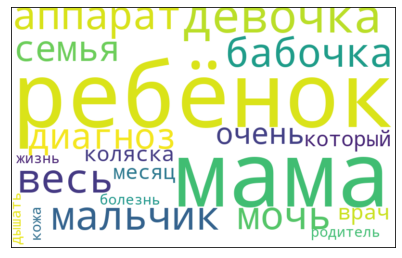

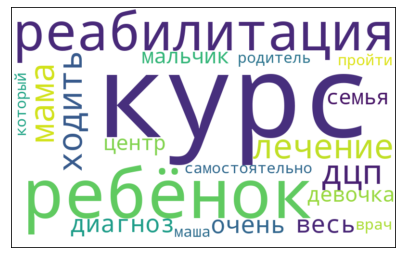

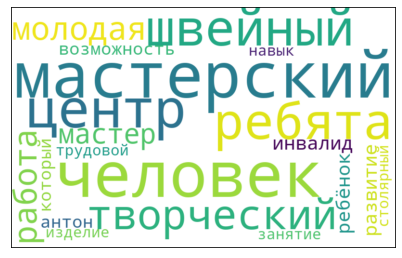

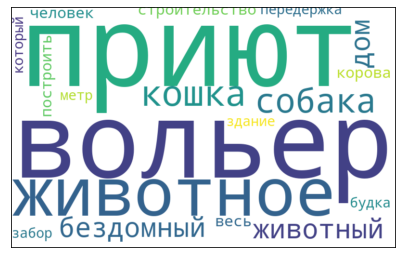

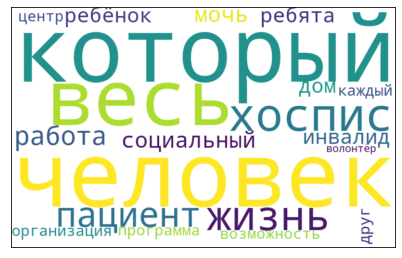

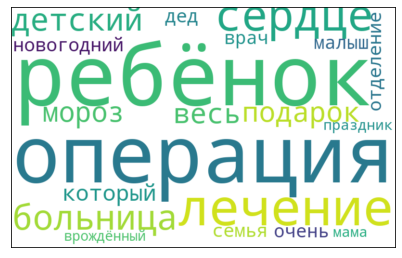

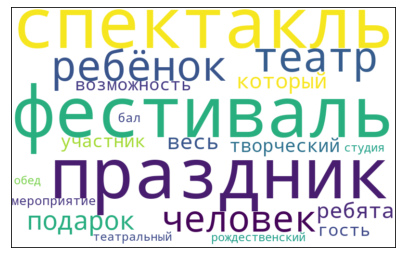

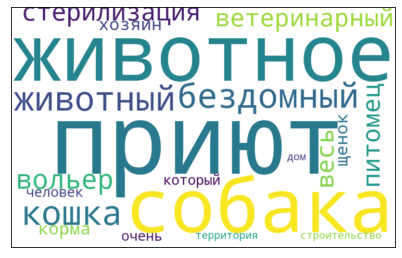

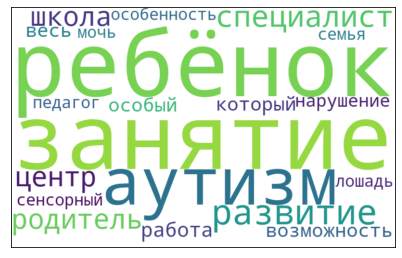

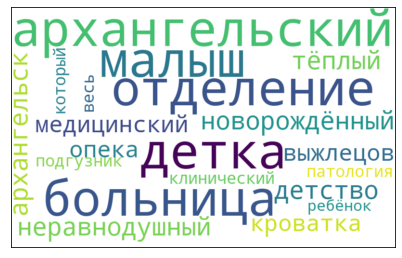

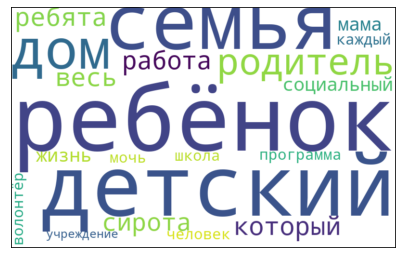

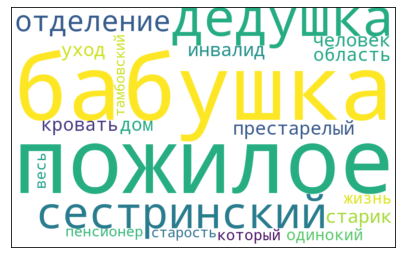

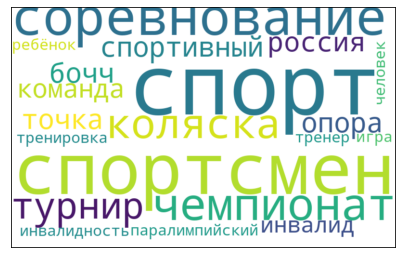

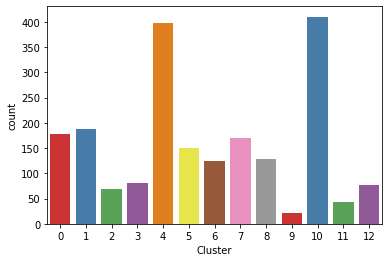

In [ ]:
if __name__ == "__main__":
    df = pd.read_csv('plset_fin_upd.csv')
    df.dropna(subset=["Description"], inplace=True)
    text = df['Description'].values.astype('U')
    df = df_upd(df)
    sns.countplot(x=df['Cluster'], data=df, palette="Set1")

    #print(df.head(5))

In [ ]:
for i in range(13):
    print("\n", "Кластер %d:" % i, len(df.loc[df['Cluster'] == i]))
    print(df.loc[df["Cluster"] == i, "Briefly"][:7])


 Кластер 0: 177
25    Сбор средств на лечение ребенка-бабочки Никиты...
26    Диана - девочка-бабочка. От рождения ее кожа о...
39    Проект на приобретение синтезаторов для детей-...
68    Маленькой Маше, которая болеет всю свою жизнь,...
74    Исмаил - мальчик-бабочка. У него дистрофическа...
76    Диме всего год, и он очень болен. Чтобы помога...
98    3-летний Витя очень болен. Настолько, что не м...
Name: Briefly, dtype: object

 Кластер 1: 188
15     Реабилитационный курс для мальчика с детский ц...
27     Марк – мечтает танцевать. Ему 4 года и он гото...
31     Помогите Алеше Короткову приобрести коляску-хо...
56     БФ «Галчонок» помогает Диме и Веронике с диагн...
60     "Лыжи мечты" Сергея Белоголовцева - программа ...
63     Благотворительный фонд «Галчонок» собирает сре...
104    Благотворительный фонд «Галчонок» собирает сре...
Name: Briefly, dtype: object

 Кластер 2: 69
13     Керамическая мастерская, в которой слепоглухие...
95     Центр «Антон тут рядом» — первый прое

In [ ]:
sns.countplot(x=df['Cluster'], data=df, palette="Set1")
#plt.show()
#df.to_csv('plset_fin_upd_clustered.csv')